In [14]:
import pickle
import matplotlib.pyplot as plt


In [82]:
def prepare_ratios_to_boxplot(ratios_dict):
    dict_ratios_to_boxplot = {'gradient':{'1block':[],'2block':[],'3block':[],'4block':[],'all':[]},
                              'gradientshap':{'1block':[],'2block':[],'3block':[],'4block':[],'all':[]}, 
                              'deeplift':{'1block':[],'2block':[],'3block':[],'4block':[],'all':[]}, 
                              'saliency':{'1block':[],'2block':[],'3block':[],'4block':[],'all':[]}, 
                              'InputXGradient':{'1block':[],'2block':[],'3block':[],'4block':[],'all':[]}, 
                              'backprop':{'1block':[],'2block':[],'3block':[],'4block':[],'all':[]}, 
                              'deconv':{'1block':[],'2block':[],'3block':[],'4block':[],'all':[]}, 
                              'LRP':{'1block':[],'2block':[],'3block':[],'4block':[],'all':[]}
                             }

    for m in ratios_dict.keys():
        if m.find('1conv')!=-1:
            for xai_ratio in ratios_dict[m][0].keys():
                dict_ratios_to_boxplot[xai_ratio]['1block']+=ratios_dict[m][0][xai_ratio]

        elif m.find('2conv')!=-1:
            for xai_ratio in ratios_dict[m][0].keys():
                dict_ratios_to_boxplot[xai_ratio]['2block']+=ratios_dict[m][0][xai_ratio]

        elif m.find('3conv')!=-1:
            for xai_ratio in ratios_dict[m][0].keys():
                dict_ratios_to_boxplot[xai_ratio]['3block']+=ratios_dict[m][0][xai_ratio]

        elif m.find('4conv')!=-1:
            for xai_ratio in ratios_dict[m][0].keys():
                dict_ratios_to_boxplot[xai_ratio]['4block']+=ratios_dict[m][0][xai_ratio]

        elif m.find('all')!=-1:
            for xai_ratio in ratios_dict[m][0].keys():
                dict_ratios_to_boxplot[xai_ratio]['all']+=ratios_dict[m][0][xai_ratio]
                
    return dict_ratios_to_boxplot

In [71]:
def create_boxplots(dict_ratios_to_boxplot):
    fig, ax = plt.subplots(2, 4,figsize=(40, 22))
    fig.patch.set_facecolor('xkcd:white')
    plt.rcParams['xtick.color'] = 'black'
    font_size=45
    plt.rcParams['font.size'] = font_size
    plt.rcParams['axes.titlesize']=font_size
    w = 0.7

    positions={
        'gradient':[0,0],
        'gradientshap':[0,1],
        'deeplift':[0,2],
        'saliency':[0,3],
        'InputXGradient':[1,0],
        'backprop':[1,1],
        'deconv':[1,2],
        'LRP':[1,3]}

    method_name={'gradient':'Gradient',
                 'gradientshap':'GradientShap',
                 'deeplift':'DeepLift',
                 'saliency':'Saliency',
                 'InputXGradient':'InputXGradient', 
                 'backprop':'Guided Backprop',
                 'deconv':'Deconvolution',
                 'LRP':'LRP'}

    col_imagenet='#cc79a7'#pink

    for xai_method in dict_ratios_to_boxplot.keys():
        ratios = []
        for block in dict_ratios_to_boxplot[xai_method].keys():
            ratios.append(dict_ratios_to_boxplot[xai_method][block])

        ax_img=ax[positions[xai_method][0],positions[xai_method][1]].boxplot(ratios, widths=w, showfliers=False, patch_artist=True)
        ax[positions[xai_method][0],positions[xai_method][1]].set_title(method_name[xai_method])

        if positions[xai_method][1]==0:
            ax[positions[xai_method][0],positions[xai_method][1]].set_ylabel("Explanation\n performance",fontsize=font_size+2)

        plt.setp(ax_img['medians'], color='black')
        plt.setp(ax_img['boxes'], color=col_imagenet)
        fig.subplots_adjust(wspace=0.3,hspace=0.2)

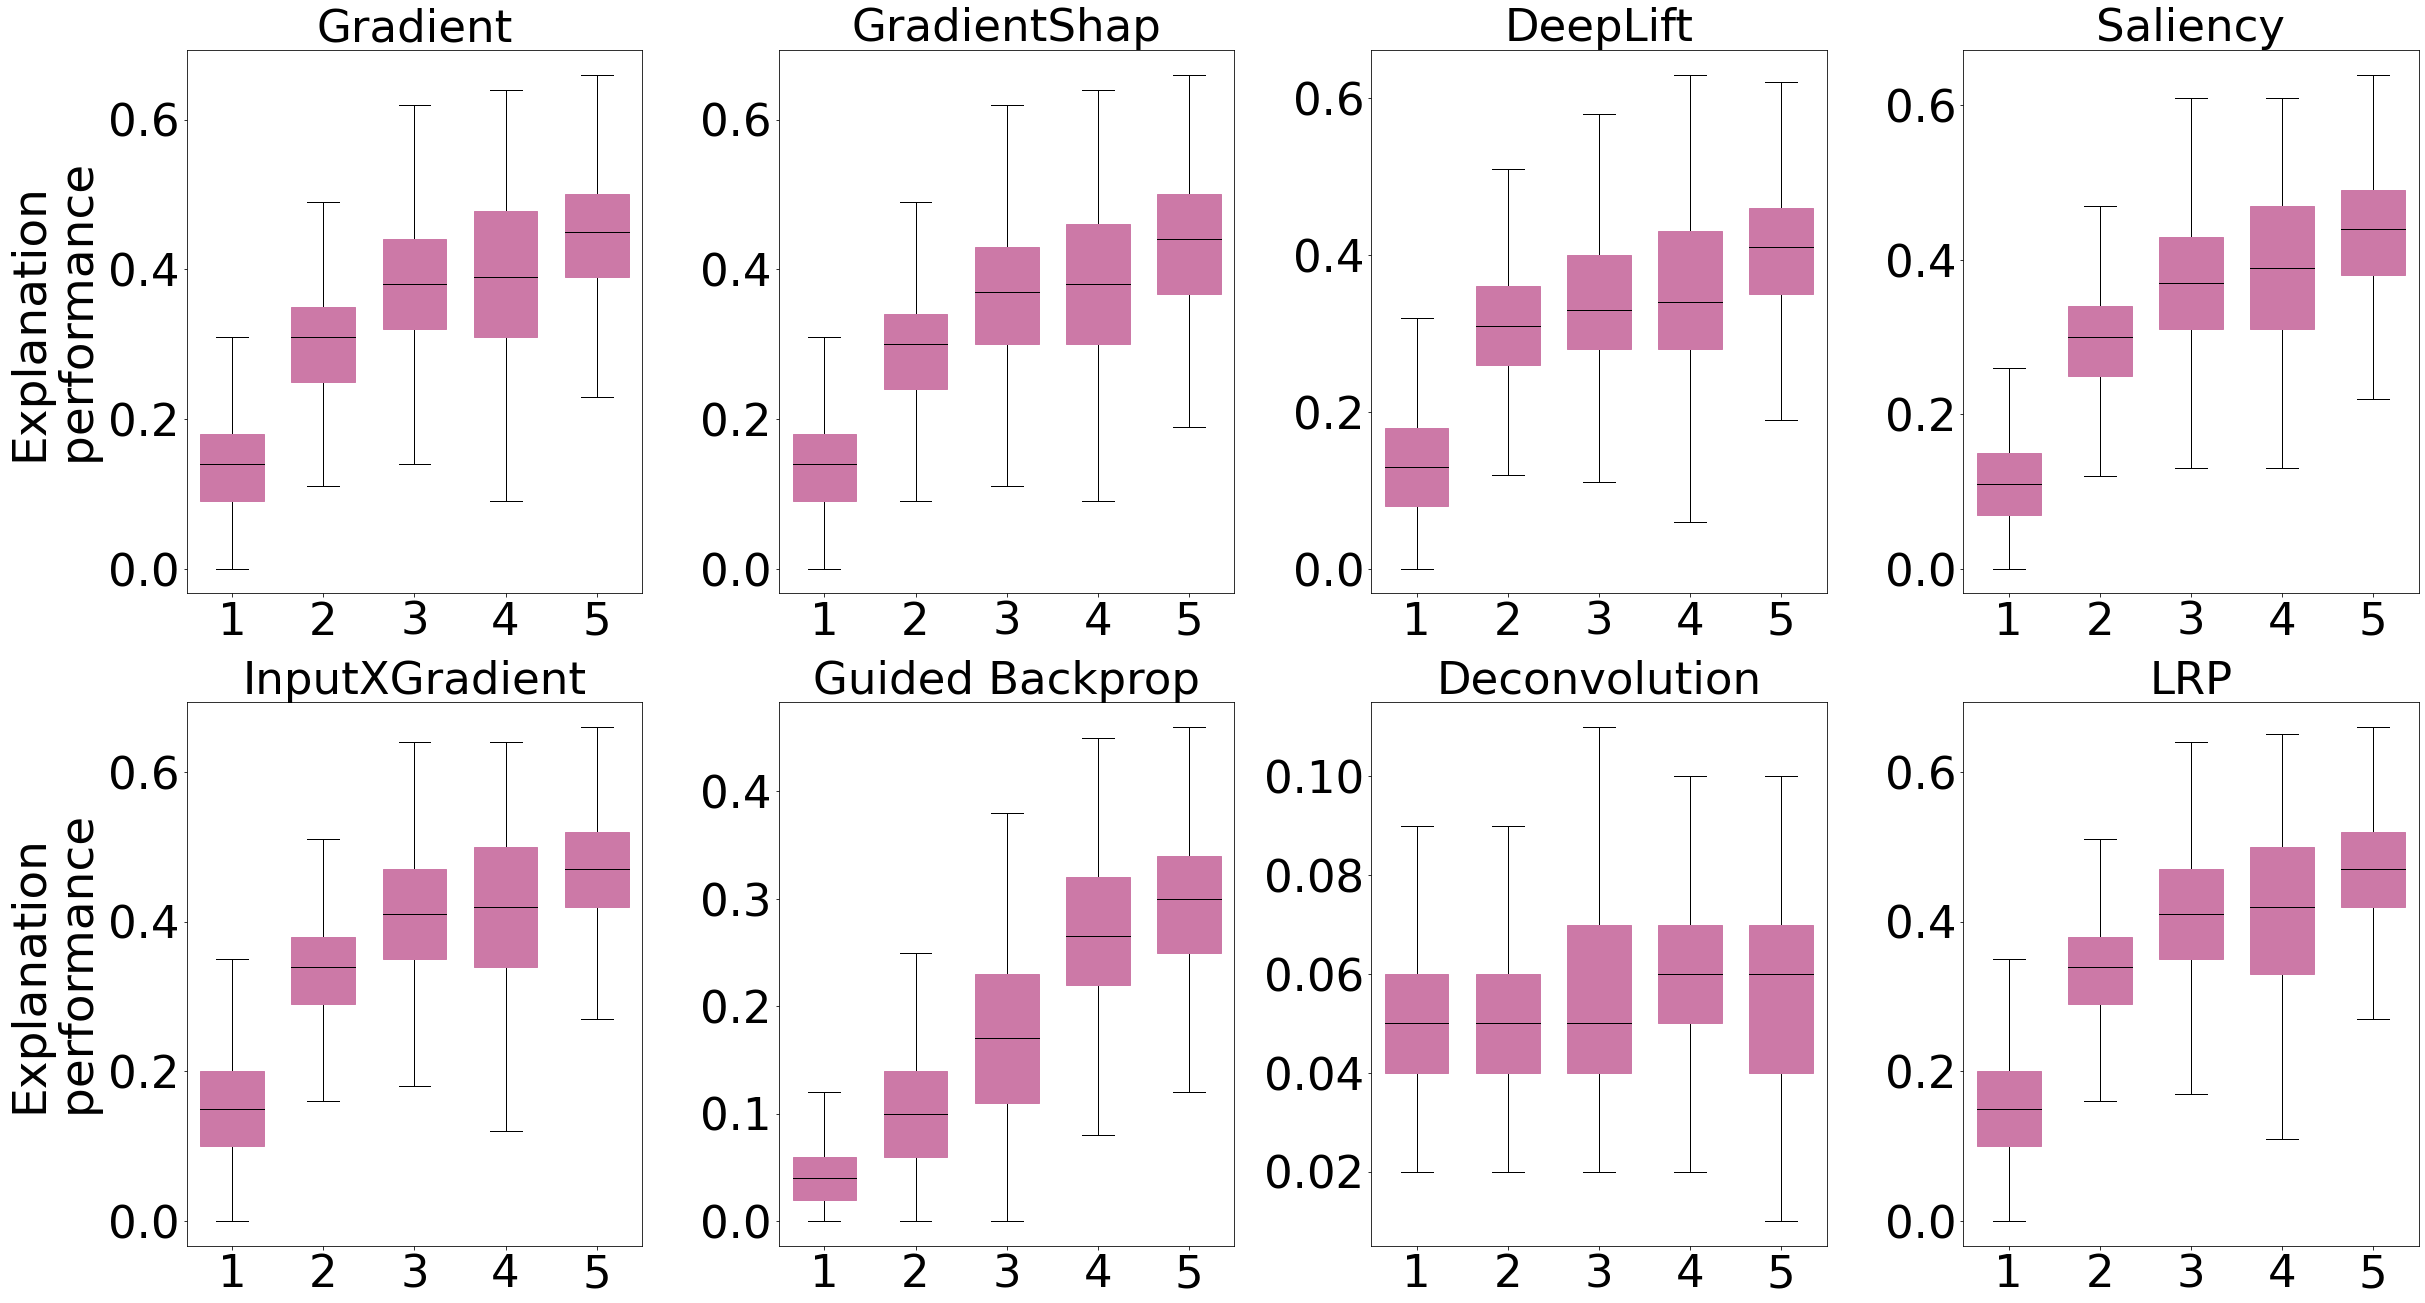

In [83]:
folder = '/home/martao/MRI_dataset/2ndTry/Models/VGG/2500/best_acc/saves/'


with open(folder+'ratios_incorrectly.pkl', 'rb') as f:
    ratios_incorrectly_best = pickle.load(f)
    
# dictionary with the models as keys 
# the 1st element of each key is a dict for each xai method

dict_ratios_to_boxplot_best = prepare_ratios_to_boxplot(ratios_incorrectly_best)
create_boxplot(dict_ratios_to_boxplot_best)

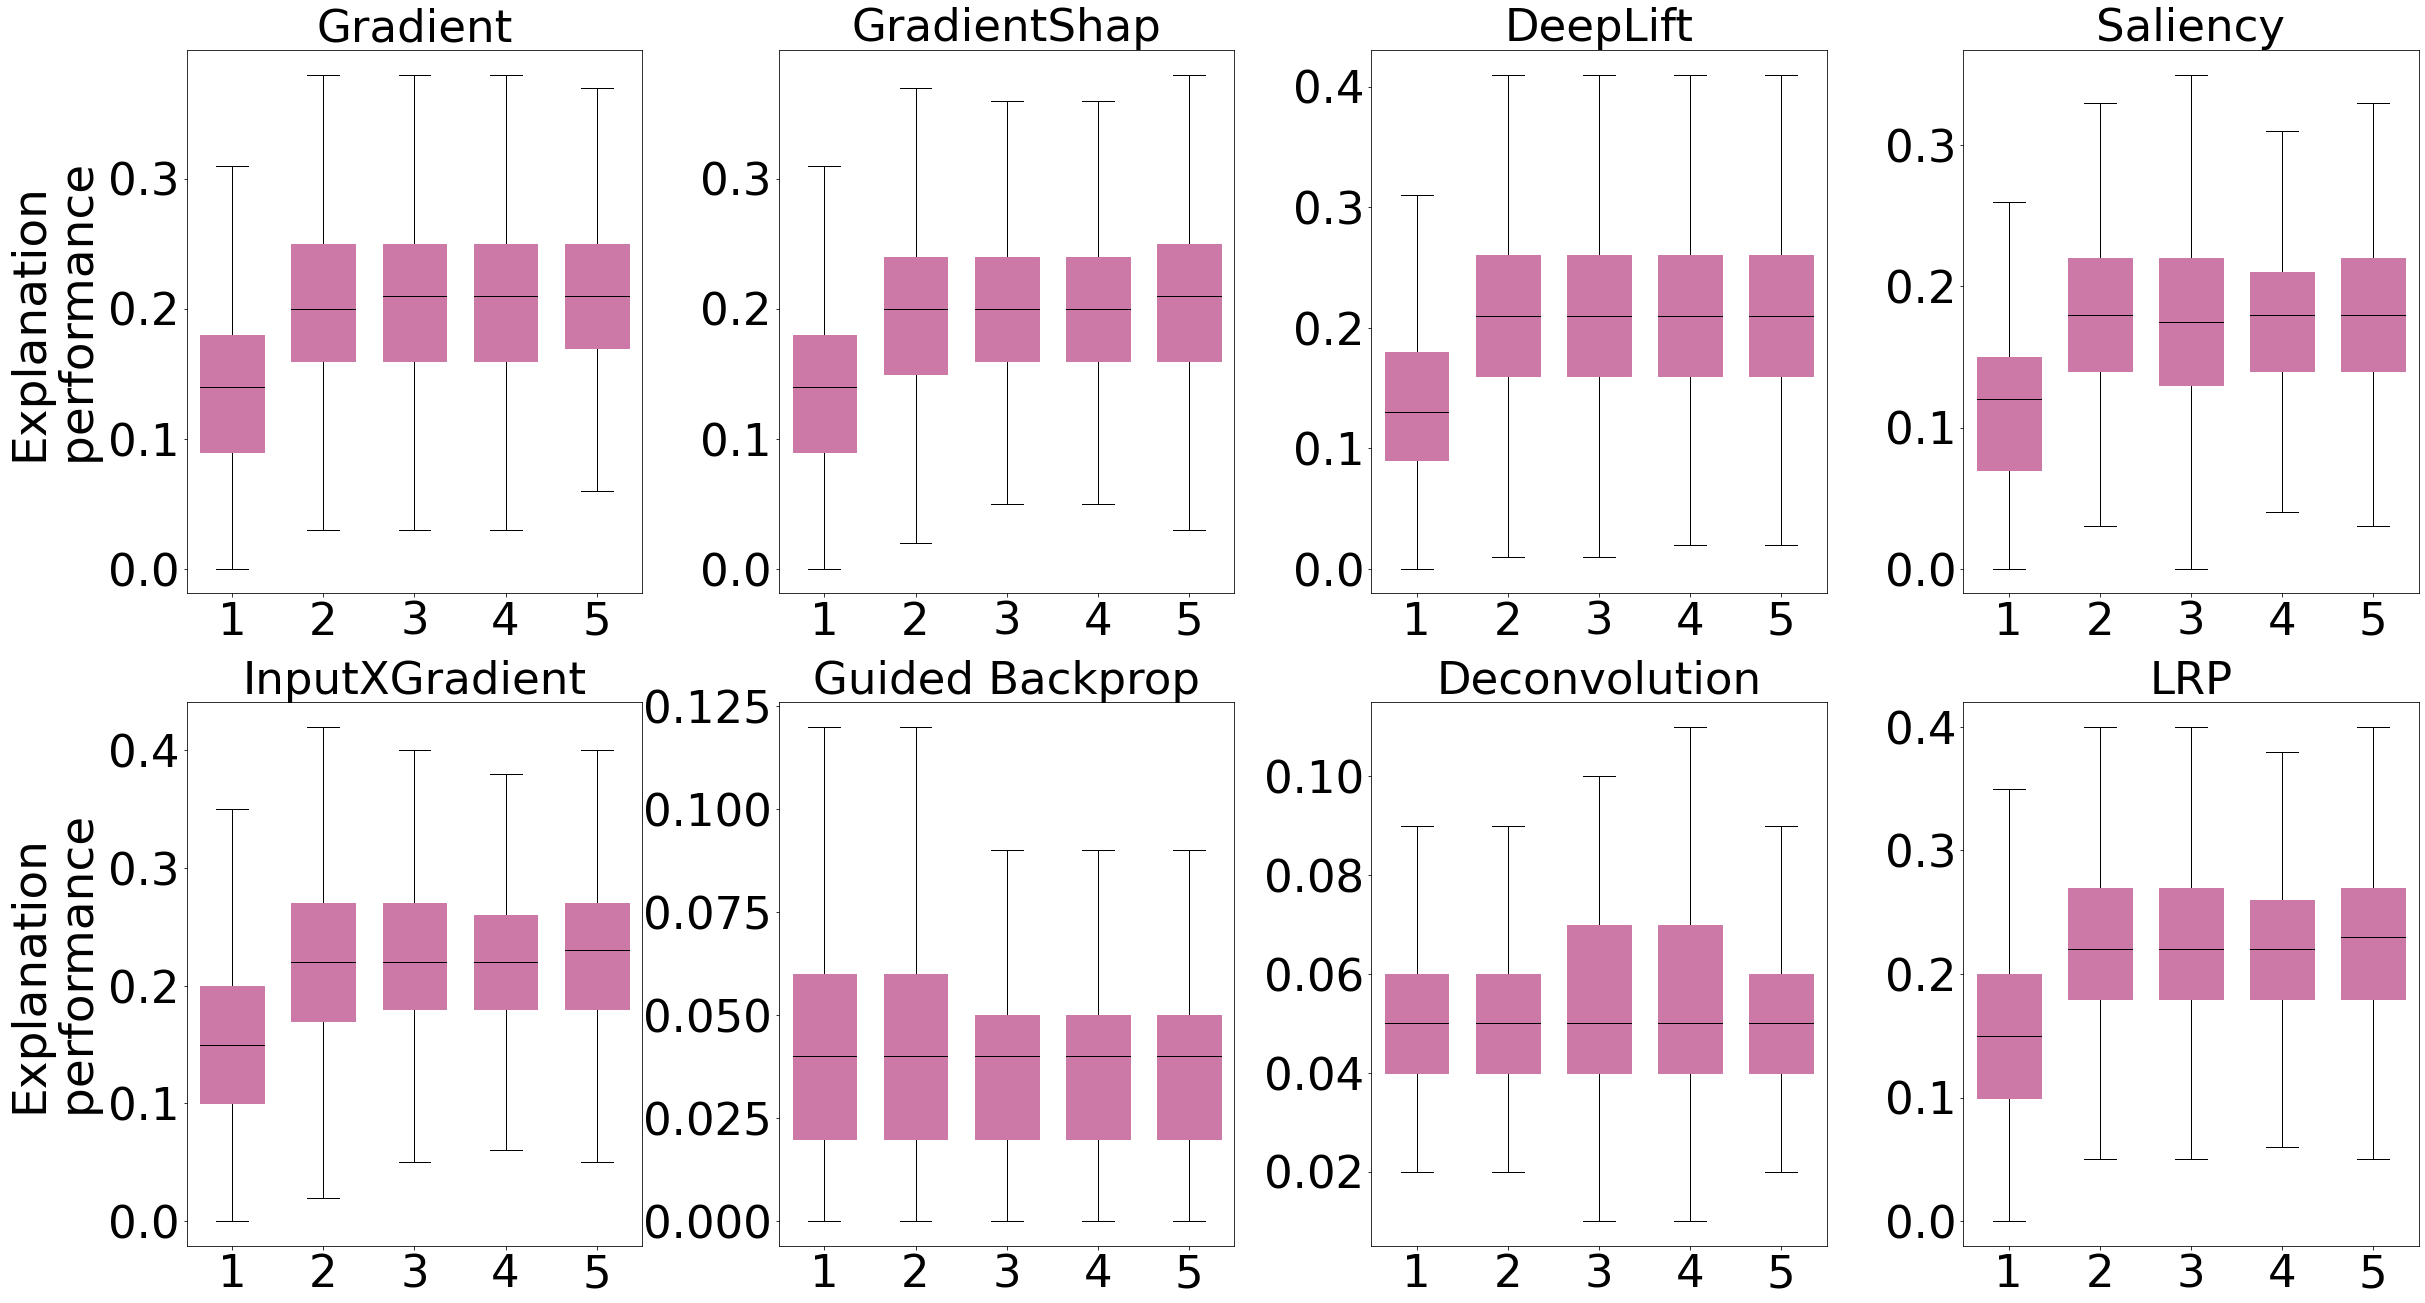

In [84]:
folder = '/home/martao/MRI_dataset/2ndTry/Models/VGG/2500/done_same_acc/saves/'


with open(folder+'ratios_incorrectly.pkl', 'rb') as f:
    ratios_incorrectly_same = pickle.load(f)
    
# dictionary with the models as keys 
# the 1st element of each key is a dict for each xai method

dict_ratios_to_boxplot_same = prepare_ratios_to_boxplot(ratios_incorrectly_same)
create_boxplot(dict_ratios_to_boxplot_same)